<a href="https://colab.research.google.com/github/vineet1947/general_code-_files-/blob/main/Image_classfication_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
!pip install tensorflow_datasets 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow as tf 
import tensorflow_datasets as tfds

In [5]:
import math 
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
import tqdm 
import tqdm.auto 
tqdm.tqdm = tqdm.auto.tqdm

In [7]:
dataset , metadata  = tfds.load('fashion_mnist' , as_supervised = True , with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteWIAEIB/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteWIAEIB/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [8]:
train_dataset ,  test_dataset  = dataset['train'],  dataset['test']

In [9]:
num_train_examples = metadata.splits['train'].num_examples 
num_test_examples  = metadata.splits['test'].num_examples 
print('nUmber of training examples : {}'.format(num_train_examples))
print("number of test examples : {}".format(num_test_examples))

nUmber of training examples : 60000
number of test examples : 10000


In [15]:
class_names =  ['T-shirt/top' , 'Trouser' , 'Pullover' , 'Dress' , 'Coat' , 'Sandal' , 'Shirt' , 'Sneakers' , 'Bag' , 'Anklr_boots' ]
def normalize(images , labels ) : 
  images = tf.cast(images , tf.float32) 
  images/= 255 
  return images , labels 

train_dataset = train_dataset.map(normalize) 
train_dataset = test_dataset.map(normalize)


In [11]:
for image , label in test_dataset.take(1) : 
  break
image = image.numpy().reshape((28,  28))

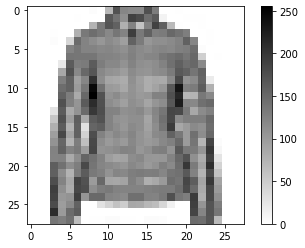

In [12]:
plt.figure() 
plt.imshow(image , cmap  = plt.cm.binary) 
plt.colorbar() 
plt.grid(False) 
plt.show()

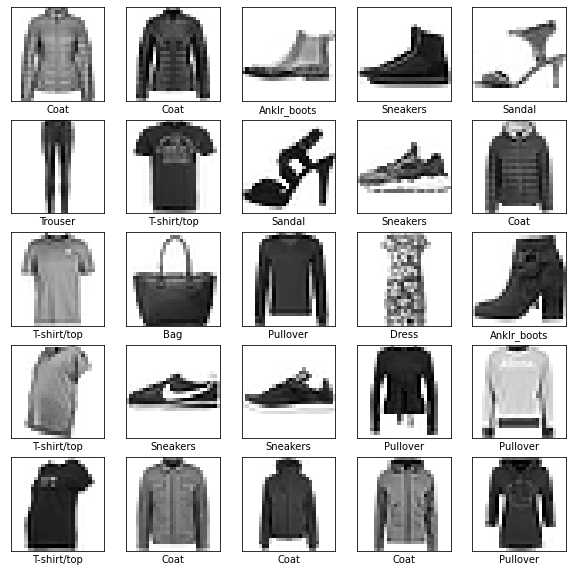

In [16]:
plt.figure(figsize = (10  , 10)) 
i = 0 

for (image , label) in test_dataset.take(25) :
  image = image.numpy().reshape((28  , 28)) 
  plt.subplot(5 ,  5 , i+1) 
  plt.xticks([]) 
  plt.yticks([]) 
  plt.grid(False) 
  plt.imshow(image , cmap = plt.cm.binary) 
  plt.xlabel(class_names[label]) 
  i+= 1 

plt.show()

In [21]:
model =  tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32 , (3,3) , padding = 'same' , activation  = tf.nn.relu , 
                    input_shape=  (28 , 28 ,1)) ,  
                    tf.keras.layers.MaxPooling2D((2,2) , strides = 2) , 
                    tf.keras.layers.Conv2D(64 , (3,3) , padding = 'same' , activation = tf.nn.relu),  
                    tf.keras.layers.MaxPooling2D((2,2) , strides = 2) , 
                    tf.keras.layers.Flatten() , 
                    tf.keras.layers.Dense(128 , activation = tf.nn.relu) , 
                    tf.keras.layers.Dense(10 , activation = tf.nn.softmax) ]

)

In [22]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , 
              metrics = ['accuracy']) 


In [23]:
BATCH_SIZE = 32 
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE) 
test_dataset = test_dataset.batch(BATCH_SIZE)

In [24]:
model.fit(train_dataset,  epochs  = 5 , steps_per_epoch = math.ceil(num_train_examples /  BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 84s 43ms/step - loss: 0.3689 - accuracy: 0.8671
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1456 - accuracy: 0.9488
Epoch 3/5
1875/1875 [==============================] - 82s 43ms/step - loss: 0.0590 - accuracy: 0.9797
Epoch 4/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0276 - accuracy: 0.9911
Epoch 5/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0177 - accuracy: 0.9945


In [25]:
for test_images , test_labels in test_dataset.take(1)  :
  test_images = test_images.numpy() 
  test_labels = test_labels.numpy() 
  predictions= model.predict(test_images)

In [26]:
predictions.shape

(32, 10)

In [27]:
predictions[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
np.argmax(predictions[0]) 


4

In [29]:
test_labels[0]

4